# 2024 Winter Introduction to Deep Learning
### Based on Prof. Oh's Youtube Lecture
https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M

> Assignment #2


*   Youtube Lecture #4-8
*   Written by Seungeun Lee

### Notice for Python
##### If you are new to Python, please follow the Youtube link below:
##### https://youtube.com/playlist?list=PLGPF8gvWLYyrkF85itdBHaOLSVbtdzBww
##### You really don't have to understand everything in this video!! Just get a feel for Python:)
##### If you have any trouble installing Python3, just use online python compiler -- I recommend https://www.programiz.com/python-programming/online-compiler/

## 1. Gradient Descent





##### Reference. https://teddylee777.github.io/scikit-learn/gradient-descent/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
## Quick Question

## What is numpy and matplotlib?
## Google it and write the answer

## Your Answer

# numpy is library including many mathematical tools.
# matplotlib is also Python library for visualization of mathematical, statistical things.

In [ ]:
# Let's make a linear function
def make_linear(w=0.5, b=0.8, size=50, noise=1.0): ## This is a 'function' name 'make_linear' - we're going to use this function later on
    x = np.random.rand(size) # size = array length / element = [0,1)
    y = w * x + b # y=wx+b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) # random noise
    yy = y + noise # adding random noise to y
    plt.figure(figsize=(10, 7)) # plotting the figure - figure size / width 10, height 7
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}') # plot x in x-axis, y in y-axis, and label -- line plot
    plt.scatter(x, yy, label='data') ## plot x in x-axis, yy (y+noise) in y-axis -- scatter plot
    plt.legend(fontsize=20) ## setting legend's fontsize
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy ## The function make_linear will return the value x and yy in the end


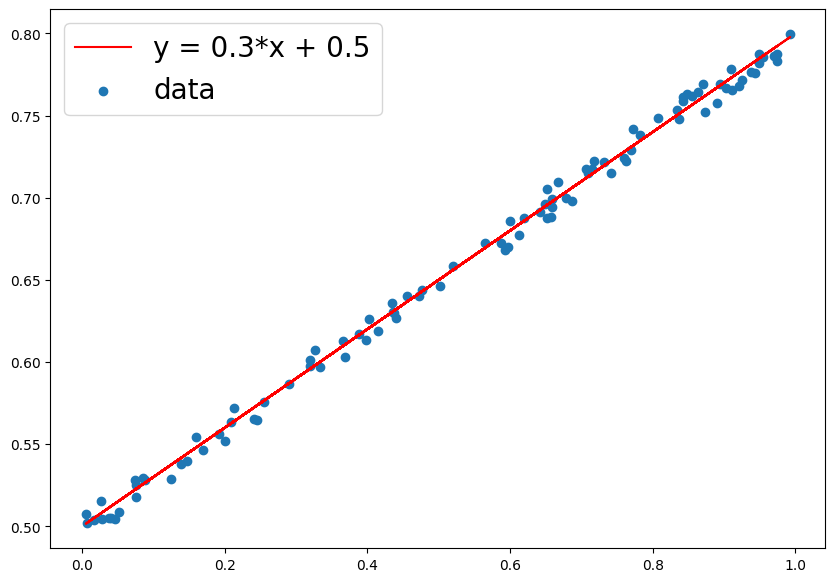

w: 0.3, b: 0.5


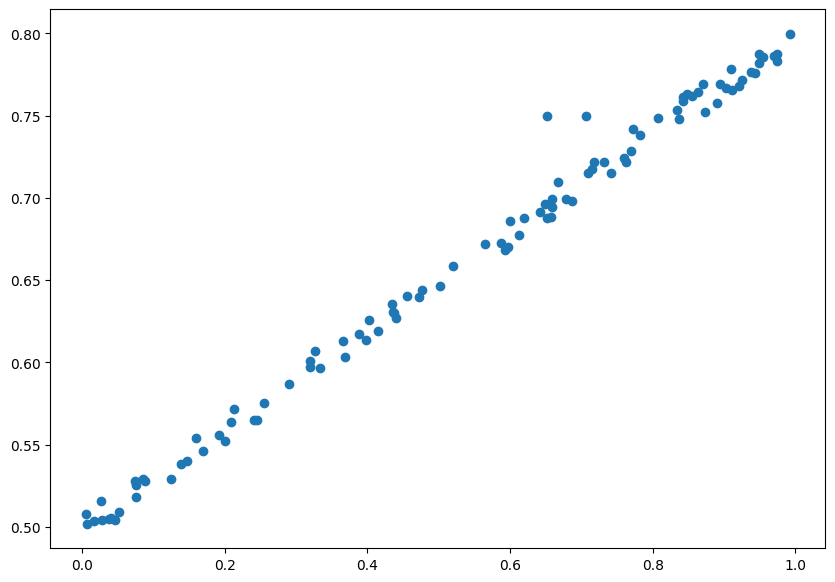

In [ ]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01) ## Here we use the function make_linear -> first figure: line + scatter plot

## Intentionally making 1 outlier
y[5] = 0.75
y[10] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x, y) ## second figure: only scatter plot
plt.show()

In [ ]:
## randomly choose w and b
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

In [ ]:
## y_hat: prediction
y_hat = w * x + b

## Loss function
error = (y_hat - y) ** 2

In [ ]:
## Quick Question
## (1) Write a name of the loss function above. HInt: _ _ _ Loss
## (Answer) MSE

## (2) Is it okay to use 'error = (y_hat-y)' or 'error = np.abs(y_hat-y)'?
## Write your own answer and justify your choice.

## Your Answer
## (1) MSE

## (2)
## error = (y_hat-y) | It may cause sum of errors to be near zero even though each errors are large.
## error = np.abs(y_hat-y) | It is possible. But unlike MSE, gradient is not continuous.

In [ ]:
# Epoch (# of iterations)
num_epoch = 5000

# Learning rate
learning_rate = 0.5

In [ ]:
## Quick Question
## (1) What is epoch? Google it and write your own answer in detail.
## (2) What is learning rate? Google in and write your own answer.

## Your Answer
## (1) It is the number of learning through the entire dataset.

## (2)
## It is multiplied to gradient.
## If it is high, weights are changed quickly.
## If it is low, it is slower but robust to noise.

In [ ]:
## Question 1
errors = []
# w, b: random initialization -- result may vary each time you execute the code
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = x * w + b
    # Prediction

    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break
    # Stop when error is small enough

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    # Smooth gradient with MSE

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    # Print progress of learning

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = -0.41432, b = 0.50486 error = 1.39005
 5 w = -0.14844, b = 0.75655 error = 0.02100
10 w = -0.07212, b = 0.71456 error = 0.01454
15 w = -0.00934, b = 0.67838 error = 0.01009
20 w = 0.04289, b = 0.64827 error = 0.00701
25 w = 0.08635, b = 0.62322 error = 0.00488
30 w = 0.12251, b = 0.60237 error = 0.00340
35 w = 0.15260, b = 0.58502 error = 0.00238
40 w = 0.17764, b = 0.57059 error = 0.00167
45 w = 0.19847, b = 0.55858 error = 0.00118
50 w = 0.21580, b = 0.54859 error = 0.00084
55 w = 0.23022, b = 0.54028 error = 0.00060
------------------------------------------------------------
58 w = 0.2, b = 0.5 error = 0.00050


### Question 1. Please write a line-by-line explanation of the code above.


*   Use '#' for Python!
*   ChatGPT allowed :) -- but please try to understand the code

## 2. Let's practice numpy

In [ ]:
import numpy as np ## np: abbreviation of numpy (convention)

In [ ]:
arr = np.array([1,2,3]) # numpy array
print(arr)

[1 2 3]


In [ ]:
arr2 = np.array([[1,2,3], [4,5,6]]) # numpy array
print(arr2)

[[1 2 3]
 [4 5 6]]


In [ ]:
arr3 = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(arr3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Quick Question (Optional)
##### https://datascienceschool.net/01%20python/03.01%20%EB%84%98%ED%8C%8C%EC%9D%B4%20%EB%B0%B0%EC%97%B4.html
##### Read and summarize the document above. <br><br>

Numpy array는 Elementwise operation을 빠르고 편하게 할 수 있다.<br>
(배열 x에 대해 2*x+3과 같이 하면 모든 원소에 대해 적용)<br><br>

arr.ndim: 배열의 차원 / arr.shape: 배열의 크기<br>
다차원 배열 슬라이싱: arr[1:3, 2:5]와 같이 가능 (양끝은 인덱스 생략)

In [ ]:
## Let's check their data type
## numpy.ndarray (n*d array)
print(type(arr))
print(type(arr2))
print(type(arr3))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
## .shape returns the shape of the numpy array
print(arr.shape) # (3, ) -> because it's 1d array (vector)
print(arr2.shape) # matrix
print(arr3.shape) # matrix

(3,)
(2, 3)
(3, 3)


In [ ]:
## How to make numpy array more conveniently?
print(np.ones((2,3))) ## ONES!!
print(2*np.ones((2,3))) ## TWOS!!

[[1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]]


In [ ]:
print(np.zeros((2,3))) ## ZEROS!!
## Of course...
print(0*np.ones((2,3))) ## ZEROS!!

[[0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
## Reshaping numpy array
arr12 = np.ones((3,4))
arr12.reshape(1, 12)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
## But what if we do not know (or do not want to know; it's lazy... but anyway) the exact size of numpy array?
## Use -1

arr12.reshape(-1, 12) ## same result!

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
## It's quite obvious but...
# arr12.reshape(-1, 5) ## this does not work

In [ ]:
## Sorting the values
arr_mixed = np.array([1,5,2,3])
print(np.sort(arr_mixed))

[1 2 3 5]


### Question 2. Sorting with numpy
##### (1) We've just sorted the vector in increasing order. Can you sort the same vector in decreasing order?
##### (2) Read the document for np.argsort (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html). Explain the numpy argsort function and execute the code with arr_mixed.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Indexing
arr4 = np.array([5,2,3,4,6])
print(arr4[1]) ## index starts with 0

2


In [ ]:
## Slicing
arr4[1:3] ## Including 1st entry, excluding 3rd entry

array([2, 3])

In [ ]:
## Quick Question
## Write a code that slices arr4 from 1st entry to 4th entry. HInt: including 1st entry, excluding 5th entry

## Your Answer
arr4[1:5]


array([2, 3, 4, 6])

## 3. Let's practice matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# this command let us view the figure in the jupyter notebook directly

[1, 2, 3]


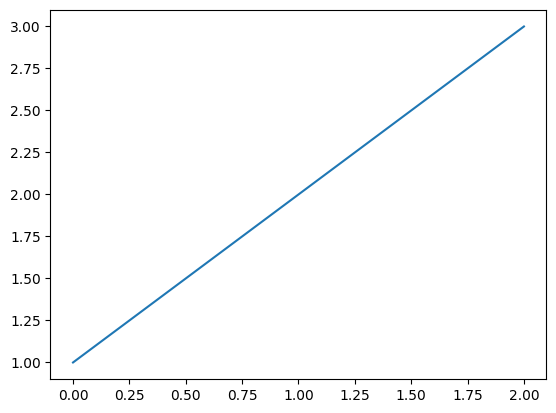

In [2]:
x = [1, 2, 3]
print(x) # list with 1, 2, and 3
plt.plot(x) # matplotlib regard this as y-axis: 1, 2, 3 (the value given) -> corresponding x-axis: 0, 1, 2 (starting from 0, having 3 elements)

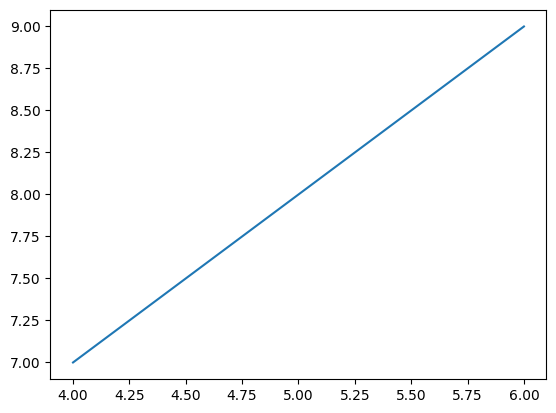

In [3]:
## But what if we specify the elements of x-axis?
x = [4, 5, 6]
y = [7, 8, 9]
plt.plot(x, y)

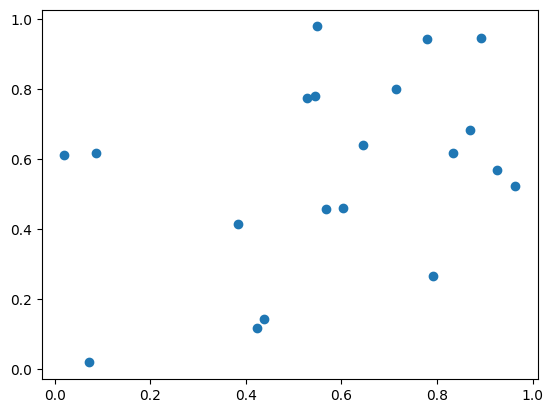

In [4]:
# We can also draw a scatter plot
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y)
plt.show()

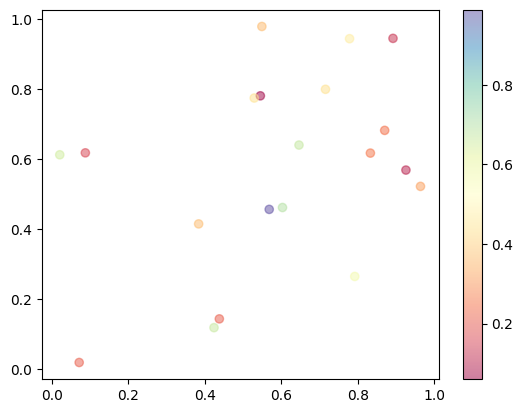

In [8]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)
colors = np.random.rand(n)

plt.scatter(x, y, c=colors, alpha=0.5, cmap='Spectral')
## alpha=transparency / cmap=color map option
plt.colorbar()
plt.show()

### Question 3. Matplotlib
##### (1) What is alpha and cmap above? Google it and write the answer.
##### (2) Write and execute a code that has alpha=0.1. Can you see the difference?
##### (3) Check the type of cmap and run the code that changed the type of cmap.

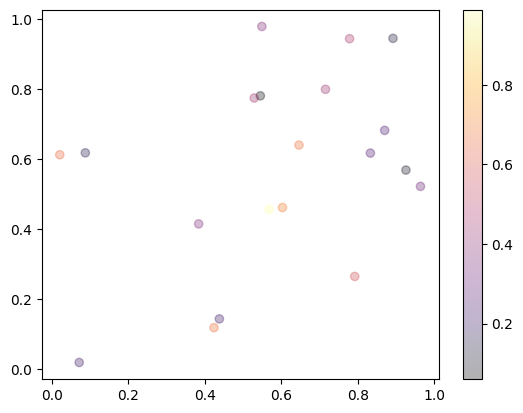

In [10]:
# alpha is transparency. 0 is transparent. 1 is opaque.
# cmap is color map option

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)
colors = np.random.rand(n)

plt.scatter(x, y, c=colors, alpha=0.3, cmap='inferno')
## alpha=transparency / cmap=color map option
plt.colorbar()
plt.show()

## Notice
### Lecture 4-8 also covers backpropagation and vanishing gradient descent problem
### But we'll stop here this week! HAPPY NEW YEAR :)

### The End.

##### Please upload your Colab file @Github https://github.com/duneag2/intro-dl/tree/main/Assignment2

*   First, make your folder by your name (e.g. seungeun)
*   Then upload your "Jupyter Notebook" file under that directory
*   코드 실행 결과 전체를 담은 파일을 업로드 해주세요!

###### Need Help?



*   Please refer to this link https://yeko90.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-colab%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EC%95%95%EC%B6%95%ED%8C%8C%EC%9D%BC-%ED%92%80%EA%B8%B0 OR
*   Just save your Jupyter Notebook (.ipynb) file in here (colab) and upload via 'Add file' - 'Upload files' https://nthree.tistory.com/60